Linear Regression for Kickstater

In [61]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [62]:
ks0 = pd.read_csv('DSI_kickstarterscrape_dataset_clean.csv',engine='python')

In [63]:
ks0 = pd.get_dummies(ks0, columns=['category'],drop_first=True)

In [64]:
ks0 # peek at the data

,Unnamed: 0,project_id,name,url,subcategory,location,status,goal,pledged,funded_percentage,...,category_Digital Art,category_Fashion,category_Film & Video,category_Food,category_Games,category_Music,category_Photography,category_Publishing,category_Technology,category_Theater
0,0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,...,0,0,1,0,0,0,0,0,0,0
1,1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,...,0,0,0,0,1,0,0,0,0,0
2,2,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,...,0,0,1,0,0,0,0,0,0,0
3,3,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,...,0,1,0,0,0,0,0,0,0,0
4,4,316217,Dinner Party - a short film about friendship.....,http://www.kickstarter.com/projects/249354515/...,Short Film,"Portland, OR",successful,3500.0,3582.0,1.023331,...,0,0,1,0,0,0,0,0,0,0
5,5,325034,Mezzo,http://www.kickstarter.com/projects/geoffsaysh...,Short Film,"Collegedale, TN",failed,1000.0,280.0,0.280000,...,0,0,1,0,0,0,0,0,0,0
6,6,407836,Help APORTA continue to make handwoven/knit ac...,http://www.kickstarter.com/projects/1078097864...,Fashion,"Chicago, IL",successful,2000.0,2180.0,1.090000,...,0,1,0,0,0,0,0,0,0,0
7,7,436325,Music - Comedy - Album!,http://www.kickstarter.com/projects/mattgriffo...,Music,"Chicago, IL",successful,1000.0,1125.0,1.125000,...,0,0,0,0,0,1,0,0,0,0
8,8,610918,The Apocalypse Calendar,http://www.kickstarter.com/projects/tqvinn/the...,Illustration,"Chicago, IL",successful,7500.0,9836.0,1.311527,...,0,0,0,0,0,0,0,0,0,0
9,10,735377,The Janks music video series,http://www.kickstarter.com/projects/thejanks/t...,Indie Rock,"Ashland, OR",successful,20000.0,20138.0,1.006911,...,0,0,0,0,0,1,0,0,0,0


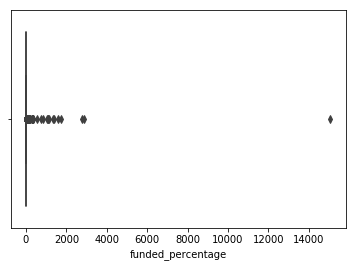

In [65]:
sns.boxplot(ks0['funded_percentage'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      funded_percentage   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     683.7
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:02:52   Log-Likelihood:                -21290.
No. Observations:               40554   AIC:                         4.261e+04
Df Residuals:                   40538   BIC:                         4.275e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.0521      0.007    696.444      0.000       5.038       5.066
updates                   0.0286      0.000     90.934      0.000       0.028       0.029
Average                  -0.0001   4.11e-06    -28.169      0.000      -0.000      -0.000
length(s)              2.538e-05   1.56e-05      1.626      0.104   -5.22e-06     5.6e-05
category_Comics          -0.0569      0.015     -3.767      0.000      -0.087      -0.027
category_Dance            0.1077      0.017      6.323      0.000       0.074       0.141
category_Design           0.0195      0.013      1.561      0.119      -0.005       0.044
category_Fashion         -0.1495      0.015    -10.202      0.000      -0.178      -0.121
category_Film & Video    -0.0581      0.008     -7.388      0.000      -0.073      -0.043
category_Food            -0.0594      0.013     -4.442      0.000      -0.086      -0.033
category_Games           -0.1020      0.013     -7.901      0.000      -0.127      -0.077
category_Music            0.0590      0.008      7.362      0.000       0.043       0.075
category_Photography     -0.1009      0.013     -7.599      0.000      -0.127      -0.075
category_Publishing      -0.1394      0.009    -14.762      0.000      -0.158      -0.121
category_Technology      -0.0686      0.017     -4.051      0.000      -0.102      -0.035
category_Theater          0.0848      0.011      7.725      0.000       0.063       0.106
==============================================================================
Omnibus:                    31674.722   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2801564.683
Skew:                           3.139   Prob(JB):                         0.00
Kurtosis:                      43.231   Cond. No.                     8.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

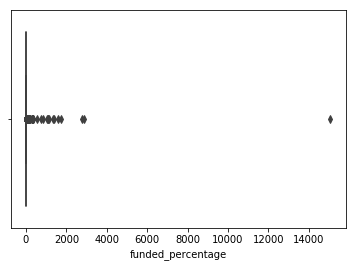

In [66]:
X3 = ks0[['updates','Average','length(s)','category_Comics','category_Dance','category_Design','category_Fashion','category_Film & Video','category_Food','category_Games','category_Music','category_Photography','category_Publishing','category_Technology','category_Theater']] 

X3 = sm.add_constant(X3) # add an intercept (beta_0) to the model
y = np.log(ks0["funded_percentage"]*100+100) # create a dataframe with the target variable (MEDV)
sns.boxplot(ks0['funded_percentage'])

# build the model: follow the format sm.OLS(output, input)
model3 = sm.OLS(y,X3, missing ='drop').fit() 

# make predictions given the x variables 
predictions = model3.predict(X3)

# print out the statistics
model3.summary()

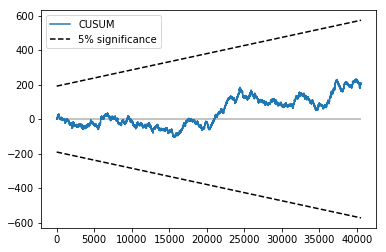

In [67]:
model7 = sm.RecursiveLS(y,X3, missing ='drop').fit() 
model7.summary()
fig = model7.plot_cusum()

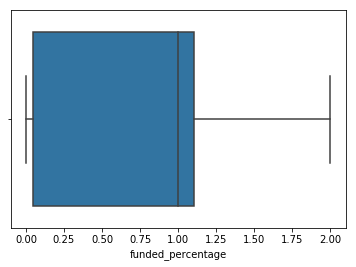

In [68]:
ks0 = ks0[ks0['funded_percentage']<2]
sns.boxplot(ks0['funded_percentage'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      funded_percentage   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     825.6
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:03:20   Log-Likelihood:                -9510.0
No. Observations:               38656   AIC:                         1.905e+04
Df Residuals:                   38640   BIC:                         1.919e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     5.0098      0.006    891.367      0.000       4.999       5.021
updates                   0.0241      0.000     94.078      0.000       0.024       0.025
Average                  -0.0001   3.16e-06    -32.260      0.000      -0.000   -9.59e-05
length(s)              8.155e-05   1.21e-05      6.762      0.000    5.79e-05       0.000
category_Comics          -0.1051      0.012     -8.741      0.000      -0.129      -0.082
category_Dance            0.1322      0.013     10.145      0.000       0.107       0.158
category_Design          -0.1220      0.010    -12.118      0.000      -0.142      -0.102
category_Fashion         -0.1467      0.011    -13.011      0.000      -0.169      -0.125
category_Film & Video    -0.0397      0.006     -6.546      0.000      -0.052      -0.028
category_Food            -0.0486      0.010     -4.711      0.000      -0.069      -0.028
category_Games           -0.1976      0.010    -18.978      0.000      -0.218      -0.177
category_Music            0.0710      0.006     11.441      0.000       0.059       0.083
category_Photography     -0.0840      0.010     -8.198      0.000      -0.104      -0.064
category_Publishing      -0.1317      0.007    -18.037      0.000      -0.146      -0.117
category_Technology      -0.1510      0.014    -11.103      0.000      -0.178      -0.124
category_Theater          0.1053      0.008     12.449      0.000       0.089       0.122
==============================================================================
Omnibus:                      361.990   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.893
Skew:                          -0.093   Prob(JB):                     3.67e-57
Kurtosis:                       2.644   Cond. No.                     8.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

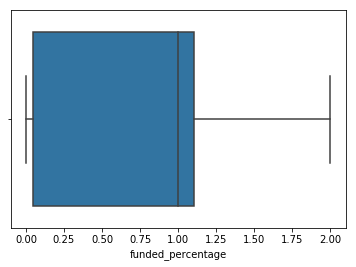

In [69]:
X3 = ks0[['updates','Average','length(s)','category_Comics','category_Dance','category_Design','category_Fashion','category_Film & Video','category_Food','category_Games','category_Music','category_Photography','category_Publishing','category_Technology','category_Theater']] 

X3 = sm.add_constant(X3) # add an intercept (beta_0) to the model
y = np.log(ks0["funded_percentage"]*100+100) # create a dataframe with the target variable (MEDV)
sns.boxplot(ks0['funded_percentage'])

# build the model: follow the format sm.OLS(output, input)
model3 = sm.OLS(y,X3, missing ='drop').fit() 

# make predictions given the x variables 
predictions = model3.predict(X3)

# print out the statistics
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      funded_percentage   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     2979.
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:54:32   Log-Likelihood:                -10863.
No. Observations:               38656   AIC:                         2.173e+04
Df Residuals:                   38652   BIC:                         2.177e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9843      0.003   1849.098      0.000       4.979       4.990
updates        0.0235      0.000     88.762      0.000       0.023       0.024
Average       -0.0001    3.2e-06    -33.149      0.000      -0.000   -9.99e-05
length(s)      0.0001   1.24e-05     10.862      0.000       0.000       0.000
==============================================================================
Omnibus:                     2638.939   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.044
Skew:                          -0.081   Prob(JB):                    8.27e-207
Kurtosis:                       2.249   Cond. No.                     1.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

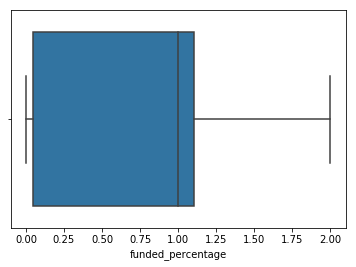

In [56]:
X1 = ks0[['updates','Average','length(s)']] 

X1 = sm.add_constant(X1) # add an intercept (beta_0) to the model
y = np.log(ks0["funded_percentage"]*100+100) # create a dataframe with the target variable (MEDV)
sns.boxplot(ks0['funded_percentage'])

# build the model: follow the format sm.OLS(output, input)
model1 = sm.OLS(y,X1, missing ='drop').fit() 

# make predictions given the x variables 
predictions = model1.predict(X1)

# print out the statistics
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      funded_percentage   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     849.2
Date:                Tue, 04 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:57:19   Log-Likelihood:                -10026.
No. Observations:               38656   AIC:                         2.008e+04
Df Residuals:                   38642   BIC:                         2.020e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.9888      0.005    912.812      0.000       4.978       5.000
updates                   0.0237      0.000     92.076      0.000       0.023       0.024
category_Comics          -0.0914      0.012     -7.511      0.000      -0.115      -0.068
category_Dance            0.1419      0.013     10.753      0.000       0.116       0.168
category_Design          -0.1195      0.010    -11.712      0.000      -0.140      -0.100
category_Fashion         -0.1489      0.011    -13.032      0.000      -0.171      -0.127
category_Film & Video    -0.0612      0.006    -10.027      0.000      -0.073      -0.049
category_Food            -0.0585      0.010     -5.597      0.000      -0.079      -0.038
category_Games           -0.1993      0.011    -18.888      0.000      -0.220      -0.179
category_Music            0.0703      0.006     11.192      0.000       0.058       0.083
category_Photography     -0.0835      0.010     -8.038      0.000      -0.104      -0.063
category_Publishing      -0.1287      0.007    -17.388      0.000      -0.143      -0.114
category_Technology      -0.1650      0.014    -11.977      0.000      -0.192      -0.138
category_Theater          0.1080      0.009     12.607      0.000       0.091       0.125
==============================================================================
Omnibus:                      644.421   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.845
Skew:                          -0.061   Prob(JB):                     8.95e-83
Kurtosis:                       2.531   Cond. No.                         99.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

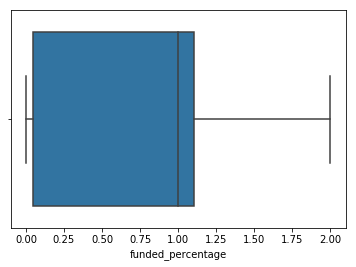

In [58]:
X2 = ks0[['updates','category_Comics','category_Dance','category_Design','category_Fashion','category_Film & Video','category_Food','category_Games','category_Music','category_Photography','category_Publishing','category_Technology','category_Theater']] 

X2 = sm.add_constant(X2) # add an intercept (beta_0) to the model
y = np.log(ks0["funded_percentage"]*100+100) # create a dataframe with the target variable (MEDV)
sns.boxplot(ks0['funded_percentage'])

# build the model: follow the format sm.OLS(output, input)
model2 = sm.OLS(y,X2, missing ='drop').fit() 

# make predictions given the x variables 
predictions = model2.predict(X2)

# print out the statistics
model2.summary()



/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


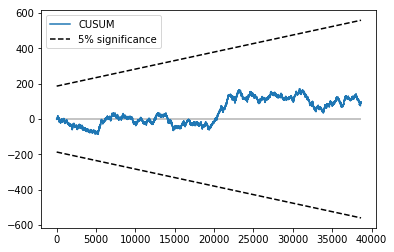

In [70]:
model4 = sm.RecursiveLS(y,X3, missing ='drop').fit() 
model4.summary()
fig = model4.plot_cusum()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


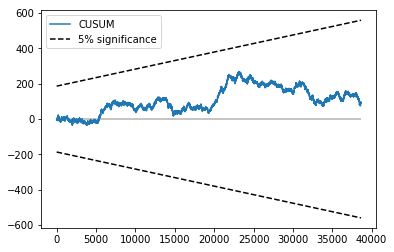

In [59]:
model5 = sm.RecursiveLS(y,X1, missing ='drop').fit() 
model5.summary()
fig = model5.plot_cusum()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


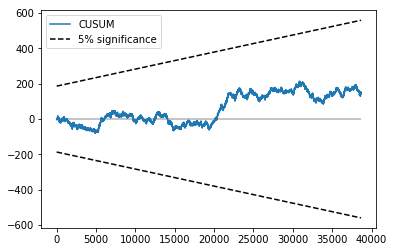

In [60]:
model6 = sm.RecursiveLS(y,X2, missing ='drop').fit() 
model6.summary()
fig = model6.plot_cusum()

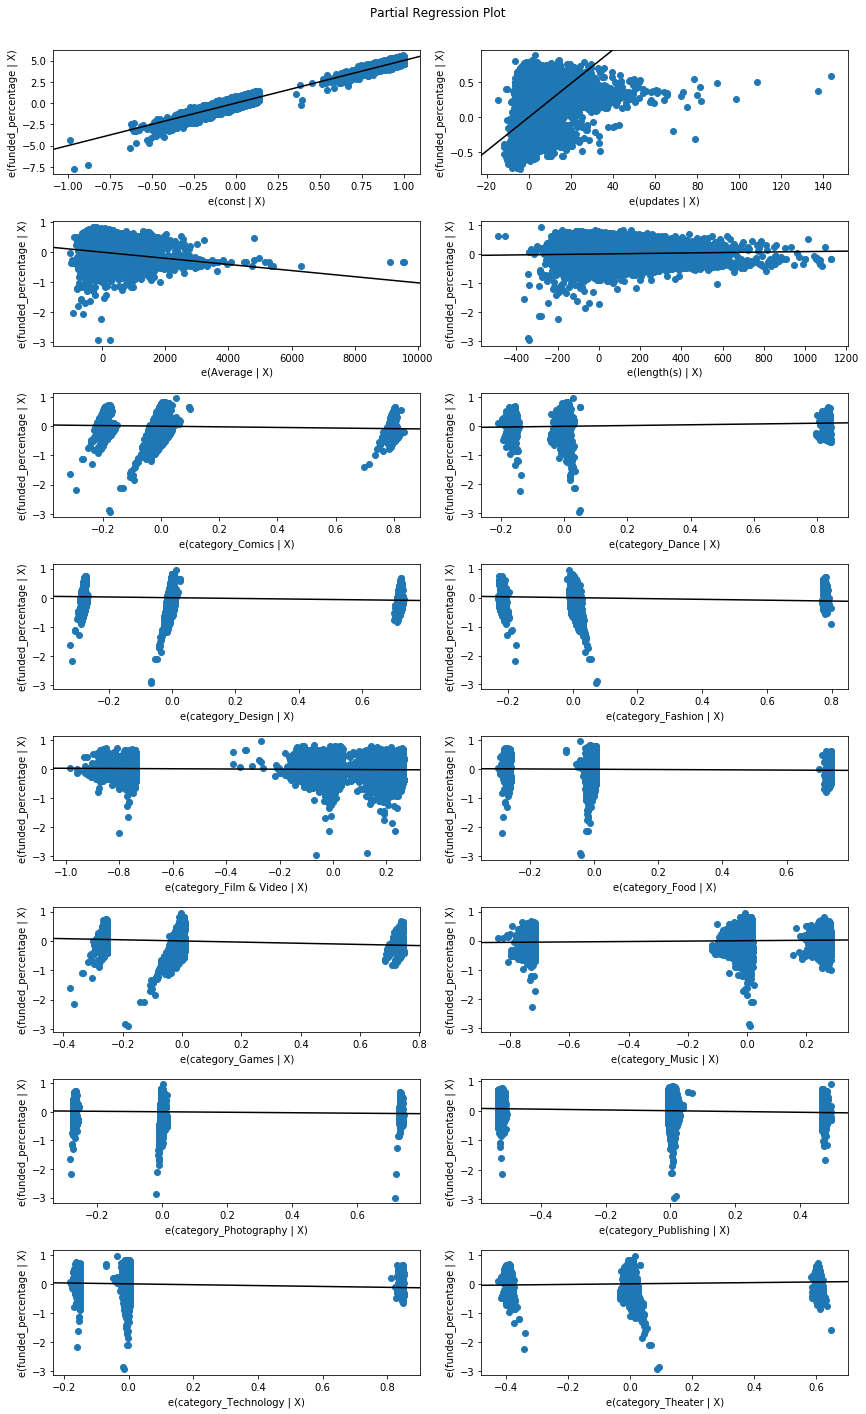

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,20))
fig = sm.graphics.plot_partregress_grid(model3, fig=fig)